### Building A Machine Learning Model To Determne The Unit Sales Of Each Product In Corporation Favorita Stores ###

# Business Understanding

***Essence of the case:***
    
>Build a predictive model that lets us know the unit sales of each product the Corporation Favorita franchise makes in its different stores across columbia.

# Data Understanding 

***What Analysis can we do?***

>Store transactions per date

>store number with the most product sales (top 10)

>Product family with the most requests or sales (top 10)

>Mostpromoted product family (either top 5 or 10)

>top stores with the most sales based on promotions

>top products recording the most sales based on promotions

>highest transacting stores (top 10)

>time frames with the highest transactions

>cities and states with the highest transactions

>cities and states with the highest promotions

>cities and states with the highest sales

>shop clusters with the highest promotion events

>shop custers with the highest transactions

>shop clusters with the highest sales

>does oil price and holiday even cause an increase in the pertronage of a commodity based on store location, cluster and region
>
does oil price and holiday affect the rate of transaction


***Hypothesis:***
1.  Promotions positively impacts the sales of each cluster of stores
2.  Oil prices negatively impacts sales
3.  Holiday periods positively impact sales
4.  Regardless of store certain product families always outsell others
5.  Oil price negatively affects the rate of transaction
6.  Holidays and promotions drive transaction rates positvely
7.  During specific time periods, certain stores record high transactions and sales
8.  Depending on location, certain stores are outselling other stores


***Questions:***
1.  Does promotion result in more sales in each cluster of store?
2.  Does Oil price negatively affect the sales in each cluster of store?
3.  what are the top 10 most pertronized product families being offered by favorita?
4.  Does oil price result in low transaction rates in each of the cluster of stores?
5.  Collectively, does holidays and promotions result in high transaction rates in each cluster of store?
6.  Which dates have the lowest and highest sales for each year?
7.  Does location result in certain cluster of stores putselling others?
8.  Are certain groups of stores (cluster, city, state, type) selling more products?
9.  Did the earthquake impact sales?
10. Is the train dataset complete (has all the required dates)?
11. Are sales affected by promotions, oil prices and holidays?
12. What analysis can we get from the date and its extractable features?
13. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)

# Data Preparation

***Steps***
1. Load all data files into the notebook
2. Examine their features
3. Identify the sections of the dataframes with missing and null values, and those with wrong data formats.
4. Work on the missing and null values, and wrong data formats
5. Derive final dataframes for data processing and visulization.

# Steps

1. Load the train data set CSV files into the notebook
2. Go through all the columns of the train data to verify if they are complete and in their right formats
3. if not, conduct the necessary edits/cleaning to ensure a uniform dataframe
4. Afterwards, I am to load the supplementary csv files which i will need for my analysis, and clean them
5. DO the necessary combinations and proceed to visualization to answer the set questions.

***Import the libraries to be used***

In [1]:
#Import Libraries
from itertools import product
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

***Import the datasets here*** 

In [13]:
# Load the training dataset here

df_train = pd.read_csv("/Users/Ebenezer Edusei/Edusei Python Studies/ML Study/post-bap-LP2-main/train.csv")
df_test = pd.read_csv("/Users/Ebenezer Edusei/Edusei Python Studies/ML Study/post-bap-LP2-main/test.csv")
Oil = pd.read_csv("/Users/Ebenezer Edusei/Edusei Python Studies/ML Study/post-bap-LP2-main/oil.csv")
holidays = pd.read_csv("/Users/Ebenezer Edusei/Edusei Python Studies/ML Study/post-bap-LP2-main/holidays_events.csv")
transactions = pd.read_csv("/Users/Ebenezer Edusei/Edusei Python Studies/ML Study/post-bap-LP2-main/transactions.csv")
stores = pd.read_csv(r"C:\Users\Ebenezer Edusei\Edusei Python Studies\ML Study\post-bap-LP2-main\stores.csv")


# Step 2: Go through all the columns of the train data to verify if they are complete and in their right formats

***Exploring the Train Data***

In [26]:
df_train.notnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype
---  ------       -----
 0   id           bool 
 1   date         bool 
 2   store_nbr    bool 
 3   family       bool 
 4   sales        bool 
 5   onpromotion  bool 
dtypes: bool(6)
memory usage: 17.2 MB


In [21]:
# the '.sort_values' was used to sort the data in decending order based on column names. In this case promotion was used
df_train.sort_values('onpromotion',ascending=False)

,id,date,store_nbr,family,sales,onpromotion
2216622,2216622,2016-05-31,53,GROCERY I,7517.0,741
2200584,2200584,2016-05-22,53,GROCERY I,6044.0,726
2211276,2211276,2016-05-28,53,GROCERY I,5846.0,722
2188110,2188110,2016-05-15,53,GROCERY I,6154.0,720
2213058,2213058,2016-05-29,53,GROCERY I,6681.0,719
...,...,...,...,...,...,...
969637,969637,2014-06-30,15,SCHOOL AND OFFICE SUPPLIES,0.0,0
969638,969638,2014-06-30,15,SEAFOOD,17.0,0
969640,969640,2014-06-30,16,BABY CARE,0.0,0
969641,969641,2014-06-30,16,BEAUTY,0.0,0


***Exploring the Test Data***

In [41]:
df_test.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           28512 non-null  bool 
 1   date         28512 non-null  bool 
 2   store_nbr    28512 non-null  bool 
 3   family       28512 non-null  bool 
 4   onpromotion  28512 non-null  bool 
dtypes: bool(5)
memory usage: 139.3 KB


***Exploring the Oil Data set***

In [27]:
Oil.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   date        1218 non-null   bool 
 1   dcoilwtico  1218 non-null   bool 
dtypes: bool(2)
memory usage: 2.5 KB


In [31]:
Oil.nunique()

date          1218
dcoilwtico     998
dtype: int64

In [75]:
# creating bool series True for NaN values
bool_series = pd.isnull(Oil["dcoilwtico"])
   
# filtering data
# displaying data only with oil values = NaN
Oil[bool_series]


,date,dcoilwtico
0,2013-01-01,NaN
14,2013-01-21,NaN
34,2013-02-18,NaN
63,2013-03-29,NaN
104,2013-05-27,NaN
132,2013-07-04,NaN
174,2013-09-02,NaN
237,2013-11-28,NaN
256,2013-12-25,NaN
261,2014-01-01,NaN


In [ ]:
oily = pd.DataFrame(list(Oil.groupby('dcoilwtico')), columns = ['price', 'dates'])

In [ ]:
oily

***Exploring the Holidays Dataset***

In [42]:
holidays.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   date         350 non-null    bool 
 1   type         350 non-null    bool 
 2   locale       350 non-null    bool 
 3   locale_name  350 non-null    bool 
 4   description  350 non-null    bool 
 5   transferred  350 non-null    bool 
dtypes: bool(6)
memory usage: 2.2 KB


***Exploring the Transactions Dataset***

In [52]:
transactions.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   date          83488 non-null  bool 
 1   store_nbr     83488 non-null  bool 
 2   transactions  83488 non-null  bool 
dtypes: bool(3)
memory usage: 244.7 KB


In [53]:
transactions.nunique()

date            1682
store_nbr         54
transactions    4993
dtype: int64

In [74]:
# creating bool series True for NaN values
bool_series1 = pd.isnull(transactions["transactions"])
   
# filtering data
# displaying data only with oil values = NaN
transactions[bool_series1]


,date,store_nbr,transactions


***Exploring the Stores Dataset***

In [57]:
stores.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   store_nbr  54 non-null     bool 
 1   city       54 non-null     bool 
 2   state      54 non-null     bool 
 3   type       54 non-null     bool 
 4   cluster    54 non-null     bool 
dtypes: bool(5)
memory usage: 398.0 bytes


In [73]:
stores.nunique()

store_nbr    54
city         22
state        16
type          5
cluster      17
dtype: int64

In [76]:
# creating bool series True for NaN values
bool_series2 = pd.isnull(stores["type"])
   
# filtering data
# displaying data only with oil values = NaN
stores[bool_series2]


,store_nbr,city,state,type,cluster


# Conclusion of Step 2

***Complete DataSets***
>Stores, Transacions and Holidays had the data in their respective dataframes complete. Next, certain columns will have to have their formats edited

***Incomplete Datasets***


# Step 3: Conduct the necessary edits/cleaning to ensure dataframe columns have values in the right format.

***Incomplete Datasets***

# The Train Data
***Question 10: Is the train dataset complete (has all the required dates)?

In [78]:
#"it seems that the df_train does not have any null values. \ 
#so we will check each column to ascertain the unique values.
#Check for ID
df_train.id.nunique(), df_train.store_nbr.nunique(), df_train.family.nunique(), df_train.date.nunique(), df_train.sales.nunique(), df_train.onpromotion.nunique()

(3000888, 54, 33, 1684, 379610, 362)

In [79]:
#converting the info in the date column into date and casting it into a new column called sales date
df_train["sales_date"] = pd.to_datetime(df_train["date"]).dt.date
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   sales_date   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 160.3+ MB


In [80]:
#identifying the minimum and maximum values in the date column in a proper DateTime format to be used for analysis
df_train.sales_date.min(), df_train.sales_date.max()

(datetime.date(2013, 1, 1), datetime.date(2017, 8, 15))

In [81]:
#verify the completeness of the dates column
#to do that we would have to subtract the maximum dtae from the minimum date to obtain the total number  of dates for further analysis.

## Expected Number of Days from our dataset
dif = (df_train["sales_date"].max() - df_train["sales_date"].min())

dif.days + 1, df_train["sales_date"].nunique()

(1688, 1684)

*** Inputting the Missing Dates with their respective values into the date column ***

In [82]:
expected_dates = pd.date_range(start=df_train["sales_date"].min(), end=df_train["sales_date"].max())
expected_dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', length=1688, freq='D')

In [83]:
set(expected_dates.date) - set(df_train["sales_date"].reindex())

{datetime.date(2013, 12, 25),
 datetime.date(2014, 12, 25),
 datetime.date(2015, 12, 25),
 datetime.date(2016, 12, 25)}

***Inference:***
>From the above it is evident that the train dataset contained missing dates which will have to be derived and added to the train dataframe to ensure its completeness.

***Adding the Omitted DataFrames***

>Codes & Steps for combining the omitted dates with the unique sotres and family and adding it to the main df
>>We will use the  'from itertools import product' to create variables consisting of the missing dates, unique store and unique product families, create a list called 'missing_data' and cast it into a df variable called TBA(to-be-added). TBA will then bemerged with the main df to obtain a complete df with all dates intact.

In [85]:
"""create variables called missing dates, unique_stores and unique_family /
to store the difference between the expected number of dates and the actual number of dates,
the unique store numbers and product families (categories) respectively"""
missing_dates = set(expected_dates.date) - set(df_train.sales_date.unique())
unique_stores = df_train.store_nbr.unique()
unique_family = df_train.family.unique() 

missing_data = list(product(missing_dates, unique_stores, unique_family))
#missing_data

#TBA = To Be Added
TBA = pd.DataFrame(missing_data, columns = ['sales_date', 'store_nbr', 'family'])
TBA

,sales_date,store_nbr,family
0,2015-12-25,1,AUTOMOTIVE
1,2015-12-25,1,BABY CARE
2,2015-12-25,1,BEAUTY
3,2015-12-25,1,BEVERAGES
4,2015-12-25,1,BOOKS
...,...,...,...
7123,2013-12-25,9,POULTRY
7124,2013-12-25,9,PREPARED FOODS
7125,2013-12-25,9,PRODUCE
7126,2013-12-25,9,SCHOOL AND OFFICE SUPPLIES


In [97]:
# Combine the df containing the missing dates with the origional dataframe
train_merged = pd.concat([TBA, df_train], ignore_index=False)
train_merged

#Replacing all the missing values in the sales and promotion column
train_merged['sales'] = merged_data['sales'].replace(np.nan, 0)
train_merged['onpromotion'] = merged_data['onpromotion'].replace(np.nan, 0)

#Converting the sales and promotion columns from float to int
train_merged['sales'] = merged_data['sales'].astype(int)
train_merged['onpromotion'] = merged_data['onpromotion'].astype(int)

In [93]:
# Combine the df containing the missing dates with the origional dataframe
train_merged = pd.concat([TBA, df_train], ignore_index=False)
train_merged

,sales_date,store_nbr,family,id,date,sales,onpromotion
0,2015-12-25,1,AUTOMOTIVE,NaN,NaN,NaN,NaN
1,2015-12-25,1,BABY CARE,NaN,NaN,NaN,NaN
2,2015-12-25,1,BEAUTY,NaN,NaN,NaN,NaN
3,2015-12-25,1,BEVERAGES,NaN,NaN,NaN,NaN
4,2015-12-25,1,BOOKS,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,3000883.0,2017-08-15,438.133,0.0
3000884,2017-08-15,9,PREPARED FOODS,3000884.0,2017-08-15,154.553,1.0
3000885,2017-08-15,9,PRODUCE,3000885.0,2017-08-15,2419.729,148.0
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,3000886.0,2017-08-15,121.000,8.0


In [94]:
# Combine the df containing the missing dates with the origional dataframe
train_merged = pd.concat([TBA, df_train], ignore_index=False)
train_merged

#Replacing all the missing values in the sales and promotion column
train_merged['sales'] = merged_data['sales'].replace(np.nan, 0)
train_merged['onpromotion'] = merged_data['onpromotion'].replace(np.nan, 0)

In [98]:
train_merged

,sales_date,store_nbr,family,id,date,sales,onpromotion
0,2015-12-25,1,AUTOMOTIVE,NaN,NaN,0,0
1,2015-12-25,1,BABY CARE,NaN,NaN,0,0
2,2015-12-25,1,BEAUTY,NaN,NaN,0,0
3,2015-12-25,1,BEVERAGES,NaN,NaN,0,0
4,2015-12-25,1,BOOKS,NaN,NaN,0,0
...,...,...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,3000883.0,2017-08-15,438,0
3000884,2017-08-15,9,PREPARED FOODS,3000884.0,2017-08-15,154,1
3000885,2017-08-15,9,PRODUCE,3000885.0,2017-08-15,2419,148
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,3000886.0,2017-08-15,121,8


***Dropping Unwanted Columns and Doing value convertions ***

In [101]:
train_comp = train_merged.drop(['id', 'date'], axis=1)
train_comp

,sales_date,store_nbr,family,sales,onpromotion
0,2015-12-25,1,AUTOMOTIVE,0,0
1,2015-12-25,1,BABY CARE,0,0
2,2015-12-25,1,BEAUTY,0,0
3,2015-12-25,1,BEVERAGES,0,0
4,2015-12-25,1,BOOKS,0,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438,0
3000884,2017-08-15,9,PREPARED FOODS,154,1
3000885,2017-08-15,9,PRODUCE,2419,148
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121,8


# Oil Data

In [141]:
"""Cleaning the Oil Data"""

#Rename the 'date' and 'dcoilwtico' column
Oil.rename(columns={'date': 'sales_date'}, inplace=True)
Oil.rename(columns={'dcoilwtico': 'price'}, inplace=True)

#Convert the dates into 'datetime' format
Oil["sales_date"] = pd.to_datetime(Oil["sales_date"]).dt.date

#Replacing the null values in the 'price' column of the Oil Dataframe
Oil["price"].fillna(method='bfill', inplace=True)

#Convert 'price' column from float to int
Oil['price'] = Oil['price'].astype(int)

# Answers

***Question One:***
>Does promotion result in more sales in each cluster of store?

In [16]:
# grouping store numbersby their total sales
sales_grouping = comp_fc.groupby(by='store_nbr').sales.agg('sum')

#generate top 10 stores/total sales
sales = sales_grouping.nlargest(10).reset_index(name='top10')


In [17]:
# grouping store numbersby their total promotions
onpromo = comp_fc.groupby(by='store_nbr').onpromotion.agg('sum')
#generate top 10 stores/total promotion
promotion = onpromo.nlargest(10).reset_index(name='top10_promotion')

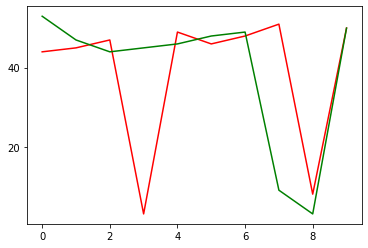

In [18]:
#Plotting a Line Graph Demonstrating the Relationship between Sales and Promotion
fig, ax = plt.subplots()

sales['store_nbr'].plot(kind='line', color='red')
promotion['store_nbr'].plot(kind='line', color='green')


plt.rcParams['figure.figsize']=(7.50, 3.50)
plt.rcParams['figure.autolayout'] = True
plt.rcParams.update({'font.size': 20})
plt.show()

# MONOVARIATE ANALYSIS

In [ ]:
# CLusters with the Most Sales
pd.pivot_table(comp_fc, index='store_nbr', values='sales', aggfunc='sum').plot.bar()

plt.title('Store Numbers with the Most Sales')
plt.ylabel('Sales')
plt.xlabel('Store Number')
plt.rcParams['figure.figsize']=(30, 30);
plt.rcParams.update({'font.size': 20})
plt.show()

***Question Four:***
>what are the top 10 most pertronized product families being offered by favorita?

In [ ]:
#Group the products by the their total sales
top_10_productfamilies = comp_fc.groupby(by='family').sales.agg('sum')

#Group the products by the top 10 total sales
prod_fam = top_10_productfamilies.nlargest(10).reset_index(name='top10_product_family')

In [ ]:
prod_fam.plot.bar(x='family', y='top10_product_family', rot=0, xlabel = 'Product Category', ylabel='Total Sales (sumt)', title = 'Ten Pertronized Products')

#add a description here when cleaning the notebook
def customize():
    plt.rcParams['figure.figsize'] = (40,30)
    plt.rcParams.update({'font.size': 30})
    plt.xticks(rotation=90)
    plt.show()
    
customize();

*** Compile the informtion with the stores information***

In [ ]:
pro_sales_strcluster = pd.concat([comp_fc, stores], axis=0)
pro_sales_strcluster

In [ ]:
pro_sales_strcluster2 = pd.concat([comp_fc, stores], ignore_index=True)
pro_sales_strcluster2.info()

In [ ]:
graph_pas = pro_sales_strcluster2.drop(['family', 'city', 'state', 'cluster', 'sales_date'], axis=1)

In [ ]:
#THE PLOT
#pro_sales_strcluster2.plot.bar(x='')
graph_pas.plot.bar(rot=15, title='rice');
plot.show(block=True)

In [ ]:
store_by_type= stores.groupby(by='type').store_nbr.agg('count')

In [ ]:
store_by_type

In [ ]:
# CLusters with the Most Sales
pd.pivot_table(stores, index='type', values='store_nbr', aggfunc='count').plot.bar()

plt.title('Total Number of Companies per Year of Establsihment')
plt.ylabel('Total Number')
plt.xlabel('Year of Establsihment')
plt.rcParams['figure.figsize']=(30, 30);
plt.rcParams.update({'font.size': 20})
plt.show()

In [ ]:
loc_by_sales

In [19]:
Oil = pd.read_csv(r"C:\Users\Ebenezer Edusei\Edusei Python Studies\ML Study\post-bap-LP2-main\oil.csv")
holidays = pd.read_csv(r"C:\Users\Ebenezer Edusei\Edusei Python Studies\ML Study\post-bap-LP2-main\holidays_events.csv")
transactions = pd.read_csv(r"C:\Users\Ebenezer Edusei\Edusei Python Studies\ML Study\post-bap-LP2-main\transactions.csv")
stores = pd.read_csv(r"C:\Users\Ebenezer Edusei\Edusei Python Studies\ML Study\post-bap-LP2-main\stores.csv")


# Oil Cleaning

In [41]:
#Cleaning the Oil Data
#Oil converting the 'dcoilwtico' values to integer
#Oil['dcoilwtico'] = Oil['dcoilwtico'].replace(np.nan, 0)
#Oil['dcoilwtico'] = Oil['dcoilwtico'].astype(int)                                                

#rename the date column
Oil.rename(columns={'date': 'sales_date'}, inplace=True)

#combining with the origional dataframe
ncomp_fc = pd.concat([Oil, comp_fc], ignore_index=False)

#ncomp_fc

# insert the missing dates and oil prices to ensure precision in your analysis

In [40]:
ncomp_fc

NameError: name 'ncomp_fc' is not defined

***Question Two:***
>Does Oil price negatively affect the sales in each cluster of store?

In [43]:
ncomp_fc['store_nbr'] = ncomp_fc['store_nbr'].replace(np.nan, 0)
#complete_df['transactions'] = complete_df['transactions'].replace(np.nan, 0)
#complete_df['cluster'] = complete_df['cluster'].replace(np.nan, 0)
ncomp_fc['dcoilwtico'] = ncomp_fc['dcoilwtico'].replace(np.nan, 0)
ncomp_fc['sales'] = ncomp_fc['sales'].replace(np.nan, 0)
ncomp_fc['onpromotion'] = ncomp_fc['onpromotion'].replace(np.nan, 0)

In [44]:
# Convert sales, oil, promotion, store number, transactions
#complete_df.info()

ncomp_fc['store_nbr'] = ncomp_fc['store_nbr'].astype(int).astype(str)
#complete_df['transactions'] = complete_df['transactions'].astype(int)
#complete_df['cluster'] = complete_df['cluster'].astype(int)
ncomp_fc['dcoilwtico'] = ncomp_fc['dcoilwtico'].astype(int)
ncomp_fc['sales'] = ncomp_fc['sales'].astype(int)
ncomp_fc['onpromotion'] = ncomp_fc['onpromotion'].astype(int)

In [45]:
sales_by_oil = ncomp_fc.groupby(by='sales').dcoilwtico.agg('count')
#top_10_productfamilies = comp_fc.groupby(by='family').sales.agg('sum')

#Top 20 sales to oil
so = sales_by_oil.nlargest(20).reset_index(name='oil_price')

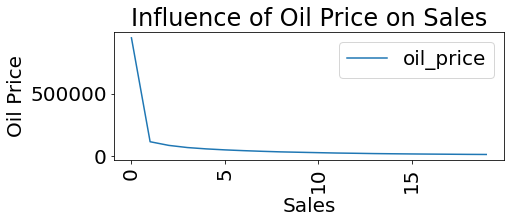

In [46]:
so.plot.line(x='sales', y='oil_price', rot=0, xlabel = 'Sales', ylabel='Oil Price', title = 'Influence of Oil Price on Sales')

def customize():
    plt.rcParams['figure.figsize'] = (20,15)
    plt.rcParams.update({'font.size': 20})
    plt.xticks(rotation=90)
    plt.show()
    return
customize();

***Question Three:***
>Does Holidays result in more sales in each cluster of store?

In [ ]:
############## Holiday Cleaning
#Drop unnecessary columns: description, locale, type
holiday_1 = holidays.drop(['locale', 'type', 'description'], axis=1)
#Rename the date column
holiday_1.rename(columns={'date': 'sales_date'}, inplace=True)
#rename the locale_name column to city
holiday_1.rename(columns={'locale_name': 'city'}, inplace=True)
#merge with origional df
#new_dataframe = pd.concat([ncomp_fc, holiday_1], ignore_index=False)



In [ ]:
holiday_1.info()

In [ ]:
 stores.info()

In [ ]:
hol = pd.merge(holiday_1, comp_fc, on='sales_date' )

In [ ]:
hol_stor

In [ ]:
comp_fc.info()

In [ ]:
df = (pd.concat([holiday_1, comp_fc], ignore_index=False))


In [ ]:
df
#.groupby(by='transferred').sales.agg('sum')
#['transferred'].que()

In [ ]:
################### Store CLeaning
#Drop unnecessary columns: state
stores_1 = stores.drop(['state'], axis=1)
#convert store_nbr column into float
stores_1['store_nbr'] = stores_1['store_nbr'].astype(float)
#merge with origional df
#ndfw_stores = pd.concat([stores_1, new_dataframe], ignore_index=False)

In [ ]:
stores_1

In [ ]:
data_frame = pd.concat([stores_1, df], ignore_index=False)

In [ ]:
data_frame

***Answer:***
>The data is insuffecient to extablsih a relationship between holidays and sales

***Question Five:***
>Does oil price result in low transaction rates in each of the cluster of stores?

In [ ]:
transactions

In [ ]:
ncomp_fc

In [ ]:
#############Transactions cleaning

#change dateto sales date
transactions.rename(columns={'date': 'sales_date'}, inplace=True)
#change store_nbr to float from int
transactions['store_nbr'] = transactions['store_nbr'].astype(float)
#merge with origional df
complete_df = pd.concat([transactions, ndfw_stores], ignore_index=False)

In [ ]:
complete_df.info()

In [ ]:
complete_df['store_nbr'] = complete_df['store_nbr'].replace(np.nan, 0)
complete_df['transactions'] = complete_df['transactions'].replace(np.nan, 0)
complete_df['cluster'] = complete_df['cluster'].replace(np.nan, 0)
complete_df['dcoilwtico'] = complete_df['dcoilwtico'].replace(np.nan, 0)
complete_df['sales'] = complete_df['sales'].replace(np.nan, 0)
complete_df['onpromotion'] = complete_df['onpromotion'].replace(np.nan, 0)

In [ ]:
complete_df

In [ ]:
# Convert sales, oil, promotion, store number, transactions
#complete_df.info()

complete_df['store_nbr'] = complete_df['store_nbr'].astype(int).astype(str)
complete_df['transactions'] = complete_df['transactions'].astype(int)
complete_df['cluster'] = complete_df['cluster'].astype(int)
complete_df['dcoilwtico'] = complete_df['dcoilwtico'].astype(int)
complete_df['sales'] = complete_df['sales'].astype(int)
complete_df['onpromotion'] = complete_df['onpromotion'].astype(int)


In [ ]:
complete_df

In [ ]:
5.  Does oil price result in low transaction rates in each of the cluster of stores?

In [ ]:
6.  Collectively, does holidays and promotions result in high transaction rates in each cluster of store?

In [ ]:
7.  What are the top 10 time periods with the most transactions and sales?

In [ ]:
8.  Does location result in certain cluster of stores putselling others?